In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Define the problem

**Given**: historical data of how much dollars a company spent on ads in different media (TV, radio, newspapers) and the respective sales.  

**Goal**: predict what will be the sales given a particular add spendings.
    

## Prepare the data (Data Preprocessing)

### Load the data

In [2]:
path_to_file = "../../datasets/various/Advertising.csv"
df = pd.read_csv(path_to_file, index_col=0)

### Get insight of the data (Prepare and clean)

In [3]:
print(df.head(5))

print(df.shape)
# print(data_df.columns.values.tolist())

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
(200, 4)


**TV**:  dollars spent on TV ads for a single product (in thousands)  
**radio**: dollars spent on radio ads (in thousands)  
**newspaper**: dollars spent on newspaper ads (in thousands)    

**sales**: sales of a single product in a given market (in thousands)

In [4]:
df.groupby('sales').max().sort_index(ascending=False).head(5)

,TV,radio,newspaper
sales,,,
27.0,276.9,48.9,41.8
26.2,287.6,43.0,71.8
25.5,283.6,42.0,66.2
25.4,289.7,49.0,51.2
24.7,220.3,49.0,3.2


#### Check for NaN / dirty values

In [5]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

#### Clean

No need to clean here.

#### Visualize with Seaborn

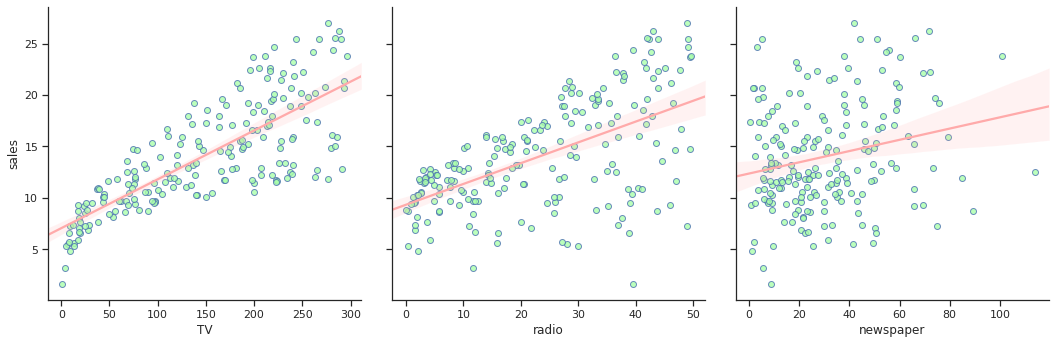

In [10]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, 
             x_vars=['TV','radio','newspaper'],              
             y_vars='sales',
             palette=sns.hls_palette(6, l=.6, s=.8),             
             markers=["o"],
             plot_kws={'line_kws':{'color':'#FFAAAA'},
                       'scatter_kws':{'facecolors':'#AAFFAA'}},
             size=5, aspect=1,kind='reg')


In [11]:
# show correlations
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


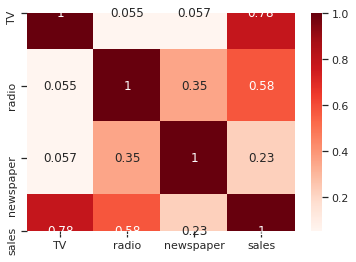

In [12]:
sns.heatmap(df.corr(),annot=True, cmap="Reds")


## Select features

<!-- From the data inspection being made, I'll decide to use the 'TV' ads as a feature.     -->

In [14]:
X = df[['TV', 'newspaper', 'radio']]
# X = df[['TV']]
y = df['sales']
print(y.shape)

(200,)


## Separate the training data from the test data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# print(f'X_train: {X_train[:5]}\n', f'y_train: {y_train[:5]}\n')
# print(f'X_test: {X_test[:5]}\n', f'y_test: {y_test[:5]}\n')

X_train:         TV  newspaper  radio
115   78.2       34.5   46.8
174  168.4       12.8    7.1
6      8.7       75.0   48.9
127    7.8       50.6   38.9
118   76.4       14.8    0.8
 y_train: 115    14.6
174    11.7
6       7.2
127     6.6
118     9.4
Name: sales, dtype: float64

X_test:         TV  newspaper  radio
96   163.3       52.9   31.6
16   195.4       52.9   47.7
31   292.9       43.2   28.3
159   11.7       45.2   36.9
129  220.3        3.2   49.0
 y_test: 96     16.9
16     22.4
31     21.4
159     7.3
129    24.7
Name: sales, dtype: float64



## Choose the model

We saw some linear correlation between 'TV' ads and sales, that's why we are going to start with LinearRegression.

In [11]:
from sklearn.linear_model import LinearRegression

## Train the model (fit the model)

In [12]:
lm = LinearRegression().fit(X_train,y_train)

In [13]:
# let's check the "learned" co-efficients:
print(lm.intercept_)
print(lm.coef_)

2.778303460245281
[0.04543356 0.00256809 0.19145654]


### Interpreting model coefficients

How to interpret these co-efficient (0.04689446)?  
The coefficient gives the relation between dollars spent on TV ads and the sales.
I.e. the amount of impact the TV adds dollars spent has on product sales.
So, we can say, that putting a 1,000$ in TV add can be associated with an increase in sales of 46,89446 products.



## Predict (classify unknown input sample)

In [14]:
y_pred = lm.predict(X_test)

In [15]:
print(y_pred[:3])

[16.38348211 20.92434957 21.61495426]


## Evaluate the model

In [16]:
from sklearn import metrics

Scikit-learn has predefined methods for most commonly used Regression Metrics: 
[scikit-learn - regression-metrics](https://scikit-learn.org/stable/modules/classes.html#regression-metrics)

Let's play with few of these:

**Mean Absolute Error** (MAE) is is the mean of the absolute value of the errors

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

MAE is the average error and is the easiest to understand.



**Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

MSE "punishes" larger errors, which tends to be useful in the real world

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

RMSE is interpretable in the "y" units.

In [17]:
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  1.4023124989385067
MSE:  2.880023730094192
RMSE:  1.6970632663793628


## Overfitting or underfitting

Let's check how our model performs on the test and on the training data

In [18]:
print("{:20s}: {:.2f}".format("Training data score", lm.score(X_train, y_train)))
print("{:20s}: {:.2f}".format("Test set score",lm.score(X_test, y_test)))

Training data score : 0.90
Test set score      : 0.89


If we use the all 3 feature, we can see that the sores are:
Training data score : 0.90
Test set score      : 0.89

This is a good result, but the scores on the training and test data are very close together.Which is a sign that we are underfitting. We need more features.

# Task: 

Use a Linear Regression model on the 'Boston house-prices dataset' sklearn.datasets.load_boston(); 

Split the data into trainin and test datasets.

Fit the model with all the available features (i.e. the defaults)

Analise how the model performs on test and on training dataset. Is there an overfit or underfit?